## 시계열_주기성체크

In [8]:
import warnings
warnings.filterwarnings('ignore')

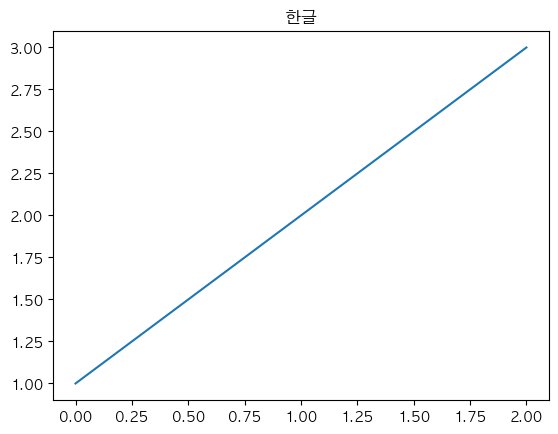

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [10]:
import pandas as pd

df = pd.read_csv('../data/울산_전처리_ver7.csv')

In [11]:
df.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [12]:
df[['Datetime','Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour']]

,Datetime,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour
0,2020-01-01 01:00:00,2020-01-01 01:00:00,2020,1,1,1
1,2020-01-01 03:00:00,2020-01-01 03:00:00,2020,1,1,3
2,2020-01-01 03:00:00,2020-01-01 03:00:00,2020,1,1,3
3,2020-01-01 04:00:00,2020-01-01 04:00:00,2020,1,1,4
4,2020-01-01 05:00:00,2020-01-01 05:00:00,2020,1,1,5
...,...,...,...,...,...,...
72106,2022-12-31 09:00:00,2022-12-31 09:00:00,2022,12,31,9
72107,2022-12-31 10:00:00,2022-12-31 10:00:00,2022,12,31,10
72108,2022-12-31 15:00:00,2022-12-31 15:00:00,2022,12,31,15
72109,2022-12-31 17:00:00,2022-12-31 17:00:00,2022,12,31,17


### 시각화_시계열 주기성 체크_건수별

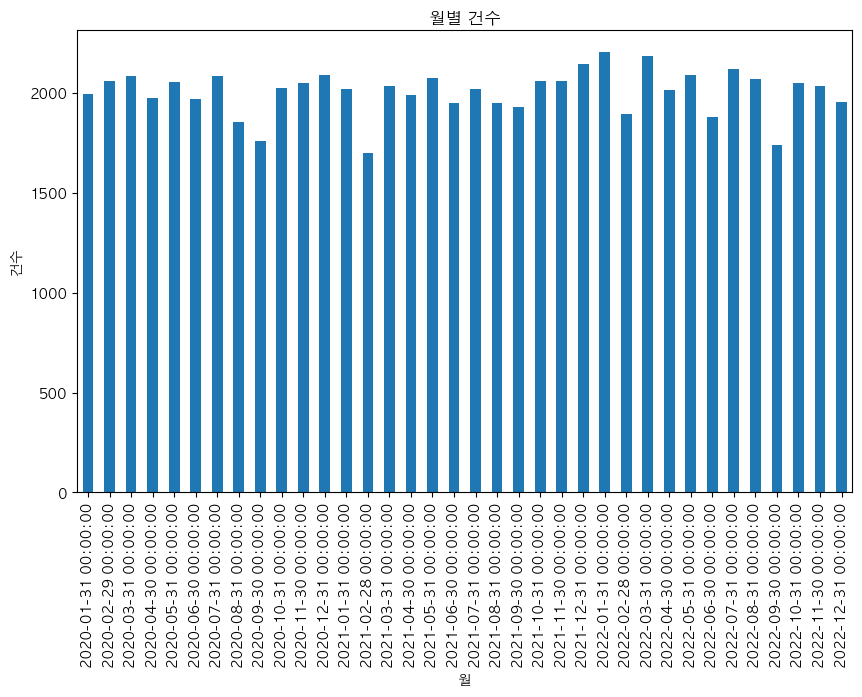

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Datetime 열을 datetime 형식으로 변환
df['Datetime'] = pd.to_datetime(df['Datetime'])

# 월별 건수 시각화
monthly_counts = df.resample('M', on='Datetime').size()
monthly_counts.plot(kind='bar', figsize=(10, 6))
plt.title('월별 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()


#### 시간별

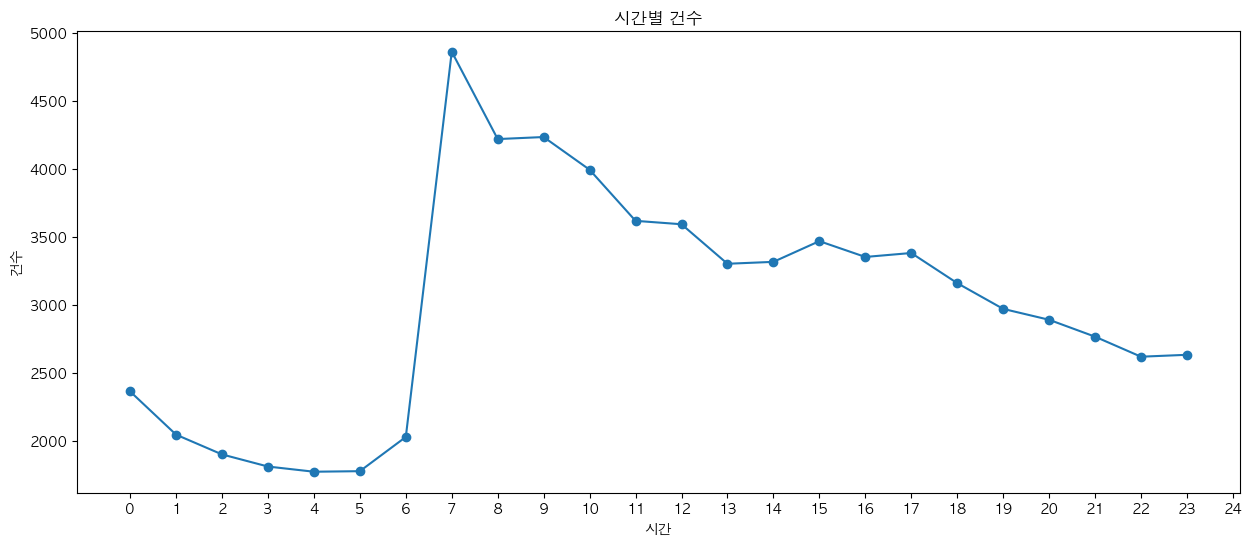

In [22]:
import pandas as pd

# 시간별 그룹화
hourly_counts = df.groupby(df['Datetime'].dt.hour).size()
hourly_counts.plot(kind='line', figsize=(15, 6), marker='o')
plt.title('시간별 건수')
plt.xlabel('시간')
plt.ylabel('건수')
plt.xticks(range(0, 25))
plt.show()


선박 대기는 7시에 가장 많이 발생할 것?

#### 요일별

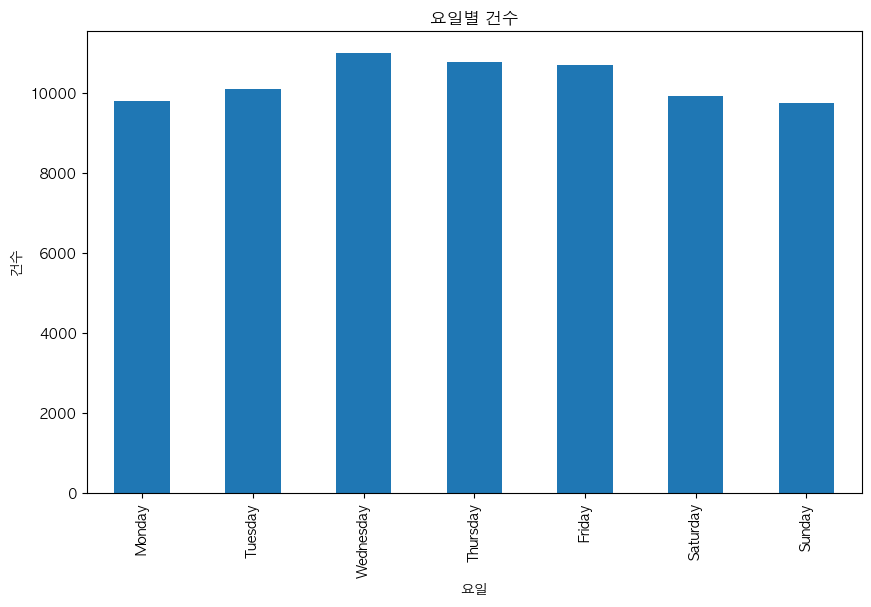

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일별 그룹화
day_of_week_counts = df.groupby(df['Datetime'].dt.day_name()).size()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order)

day_of_week_counts.plot(kind='bar', figsize=(10, 6))
plt.title('요일별 건수')
plt.xlabel('요일')
plt.ylabel('건수')
plt.show()


#### 월별

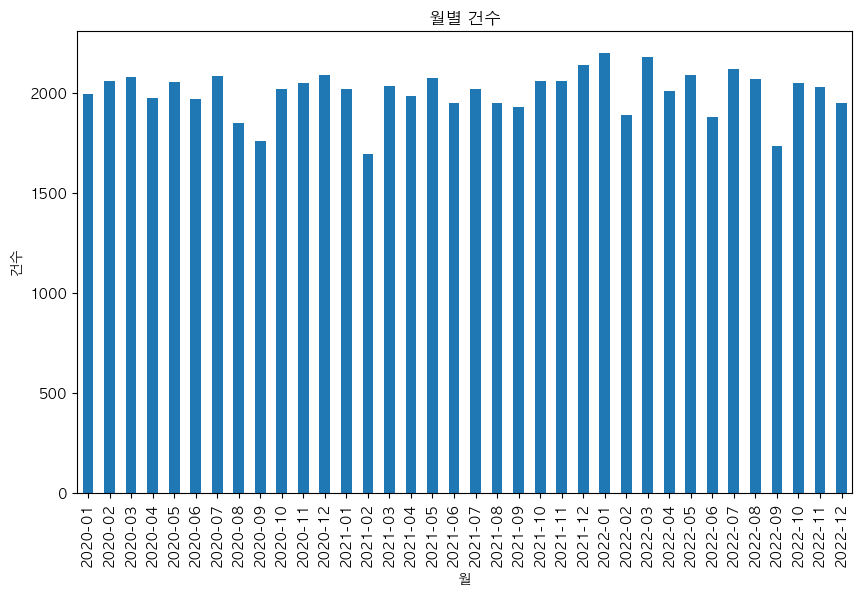

In [19]:
monthly_counts = df.groupby(df['Datetime'].dt.to_period("M")).size()
monthly_counts.plot(kind='bar', figsize=(10, 6))
plt.title('월별 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()


#### 일별

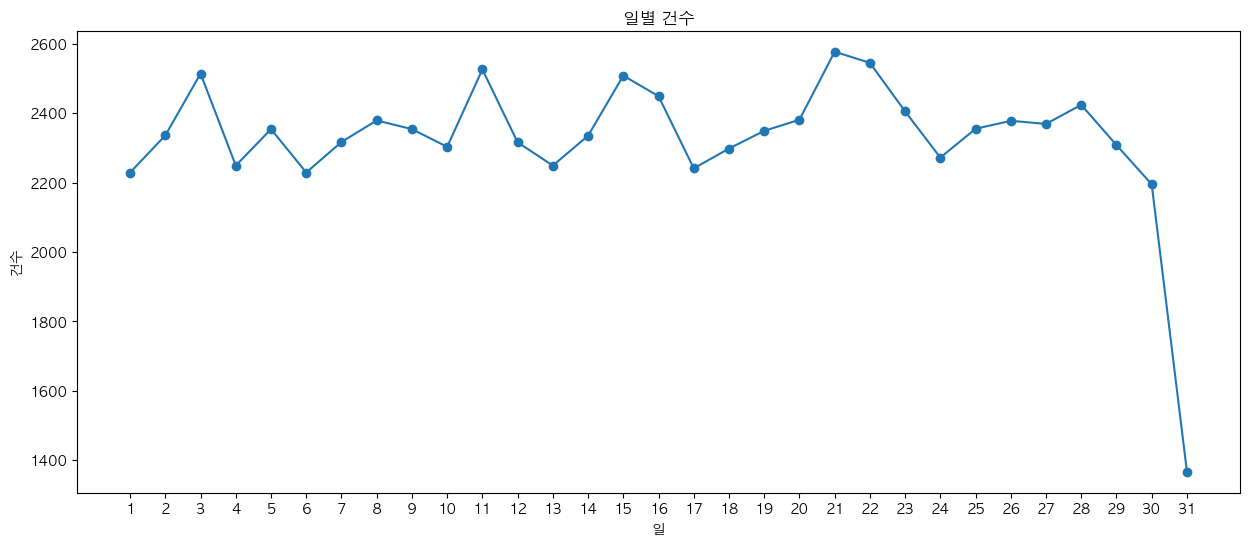

In [21]:
# 일별 그룹화

daily_counts = df.groupby(df['Datetime'].dt.day).size()
daily_counts.plot(kind='line', figsize=(15, 6), marker='o')
plt.title('일별 건수')
plt.xlabel('일')
plt.ylabel('건수')
plt.xticks(range(1, 32))  # x 축 레이블 설정
plt.show()

3,11,15,21,22일이 최고점

### 액체_주기성 체크

In [25]:
df.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

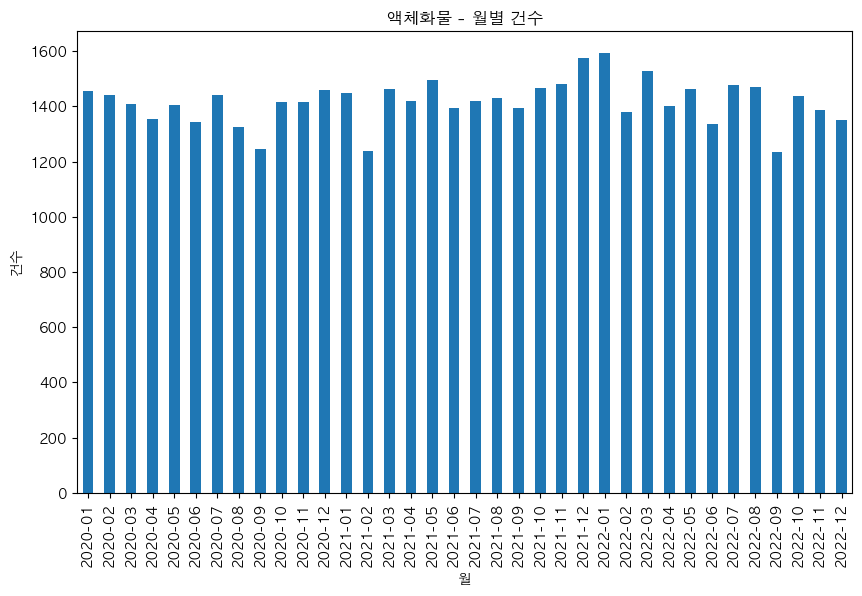

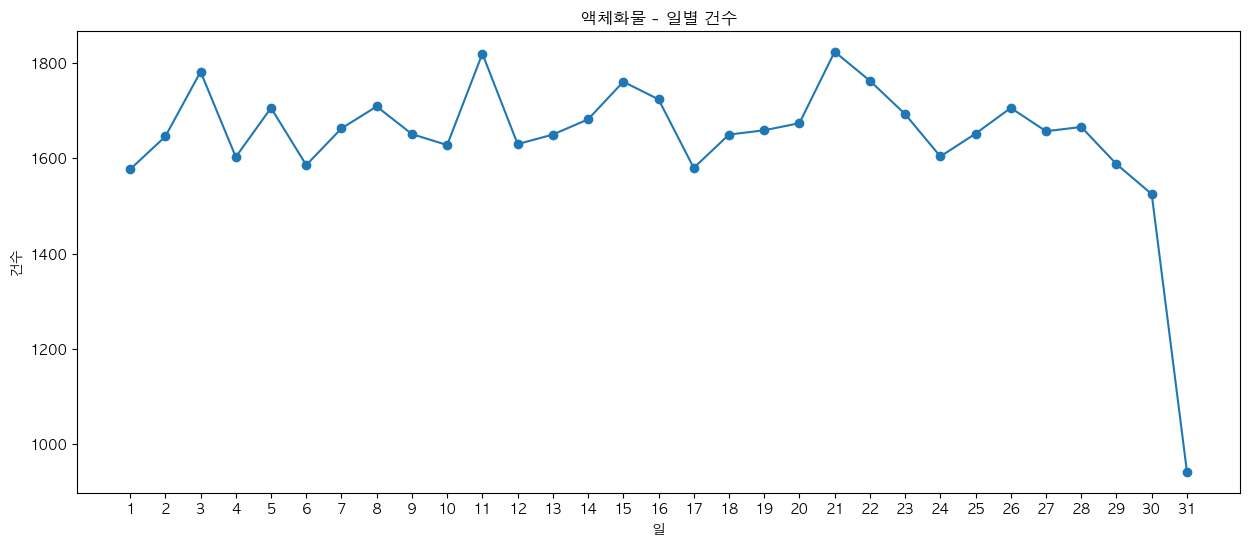

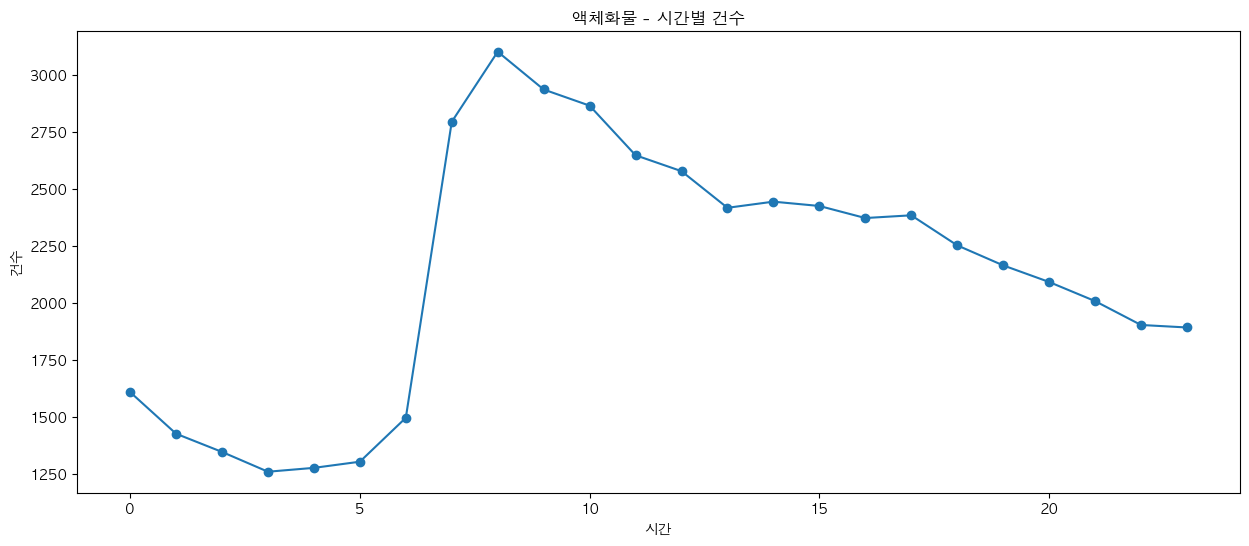

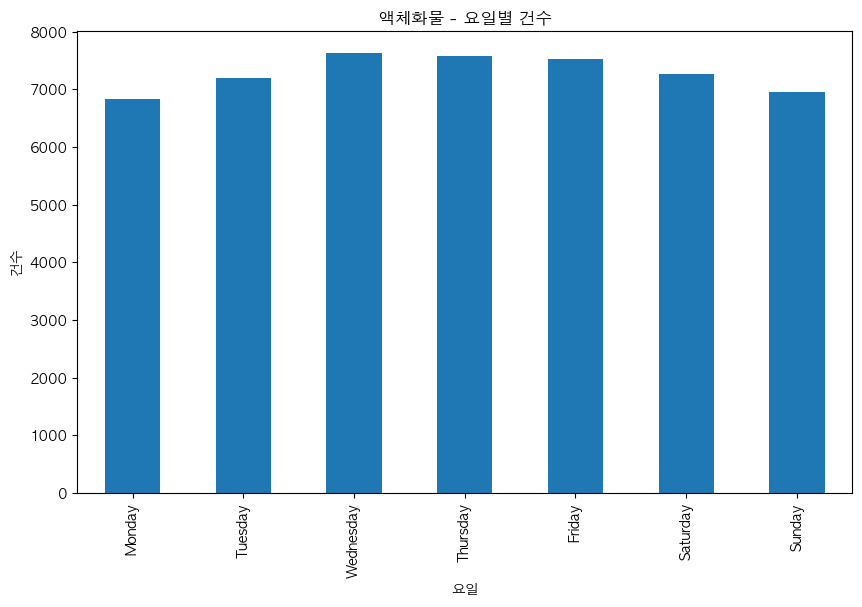

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 액체화물 그룹
liquid_cargo = ['석유제품 운반선', '케미칼 운반선', 'LPG 운반선','기타 유조선','LPG 운반선, 원유 운반선, 케미칼가스 운반선','LNG 운반선']
df['액체화물'] = df['선박용도'].apply(lambda x: 1 if x in liquid_cargo else 0)

# '액체화물' 열이 1인 행만 선택
liquid_df = df[df['액체화물'] == 1]

# Datetime 열을 datetime 형식으로 변환
liquid_df['Datetime'] = pd.to_datetime(liquid_df['Datetime'])

# 월별 그룹화
monthly_counts = liquid_df.groupby(liquid_df['Datetime'].dt.to_period("M")).size()
monthly_counts.plot(kind='bar', figsize=(10, 6))
plt.title('액체화물 - 월별 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()

# 일별 그룹화
daily_counts = liquid_df.groupby(liquid_df['Datetime'].dt.day).size()
daily_counts.plot(kind='line', figsize=(15, 6), marker='o')
plt.title('액체화물 - 일별 건수')
plt.xlabel('일')
plt.ylabel('건수')
plt.xticks(range(1, 32))  # x 축 레이블 설정
plt.show()

# 시간별 그룹화
hourly_counts = liquid_df.groupby(liquid_df['Datetime'].dt.hour).size()
hourly_counts.plot(kind='line', figsize=(15, 6), marker='o')
plt.title('액체화물 - 시간별 건수')
plt.xlabel('시간')
plt.ylabel('건수')
plt.show()

# 요일별 그룹화
day_of_week_counts = liquid_df.groupby(liquid_df['Datetime'].dt.day_name()).size()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order)

day_of_week_counts.plot(kind='bar', figsize=(10, 6))
plt.title('액체화물 - 요일별 건수')
plt.xlabel('요일')
plt.ylabel('건수')
plt.show()

### 비액체_주기성 체크

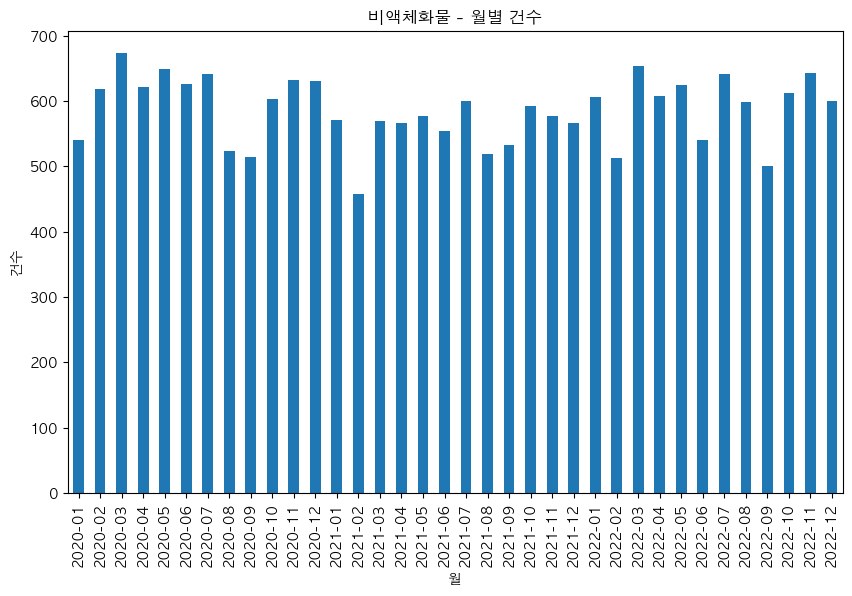

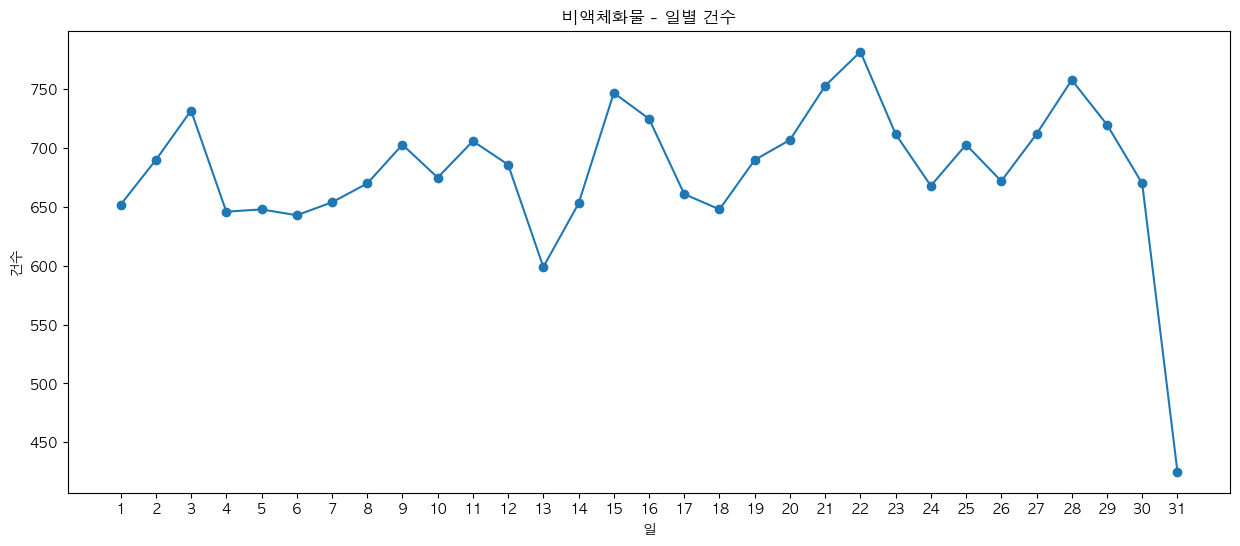

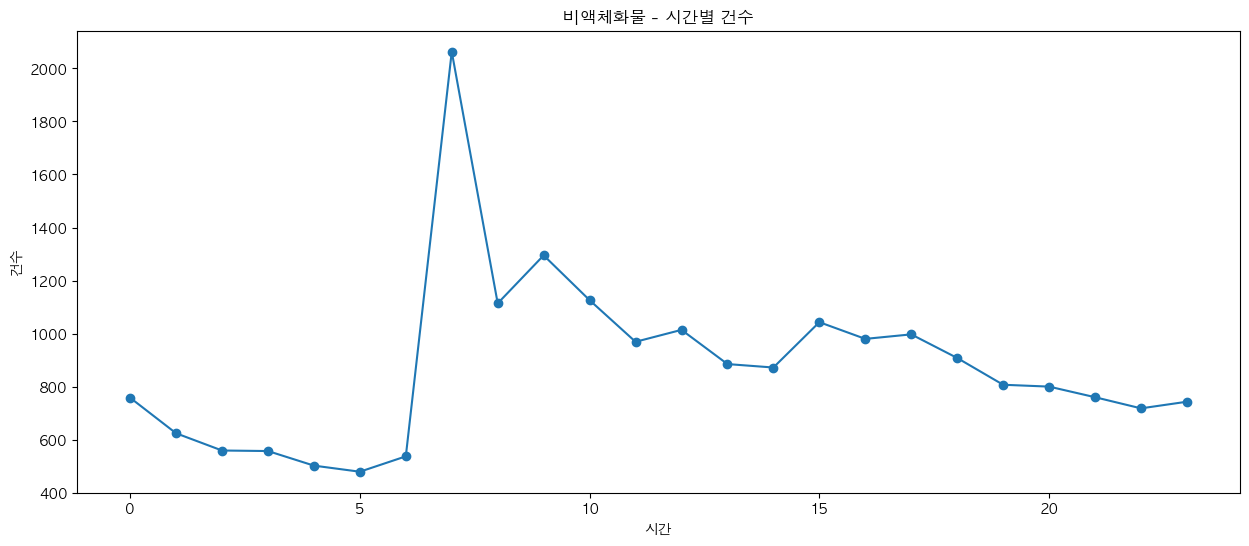

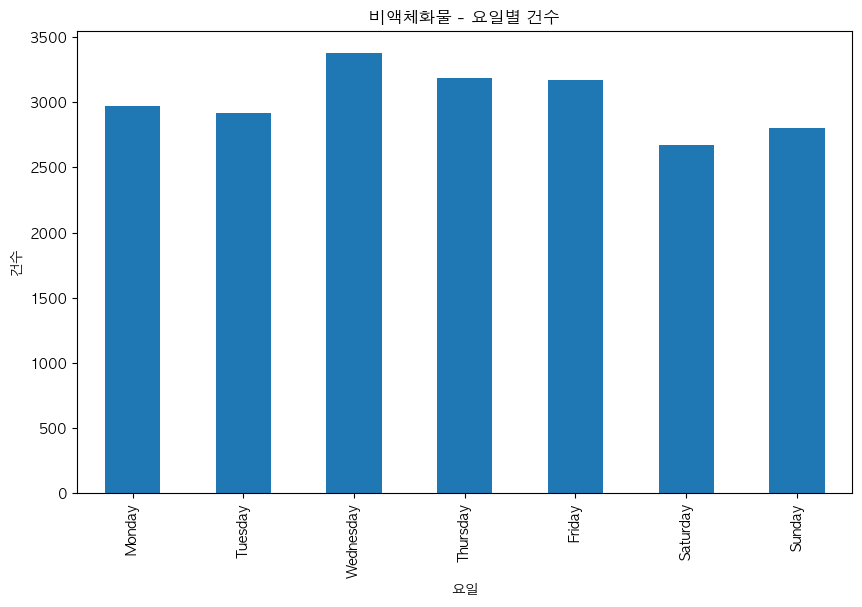

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 액체화물 그룹
liquid_cargo = ['석유제품 운반선', '케미칼 운반선', 'LPG 운반선','기타 유조선','LPG 운반선, 원유 운반선, 케미칼가스 운반선','LNG 운반선']
df['액체화물'] = df['선박용도'].apply(lambda x: 1 if x in liquid_cargo else 0)

# '액체화물' 열이 1인 행만 선택
liquid_df = df[df['액체화물'] == 0]

# Datetime 열을 datetime 형식으로 변환
liquid_df['Datetime'] = pd.to_datetime(liquid_df['Datetime'])

# 월별 그룹화
monthly_counts = liquid_df.groupby(liquid_df['Datetime'].dt.to_period("M")).size()
monthly_counts.plot(kind='bar', figsize=(10, 6))
plt.title('비액체화물 - 월별 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()

# 일별 그룹화
daily_counts = liquid_df.groupby(liquid_df['Datetime'].dt.day).size()
daily_counts.plot(kind='line', figsize=(15, 6), marker='o')
plt.title('비액체화물 - 일별 건수')
plt.xlabel('일')
plt.ylabel('건수')
plt.xticks(range(1, 32))  # x 축 레이블 설정
plt.show()

# 시간별 그룹화
hourly_counts = liquid_df.groupby(liquid_df['Datetime'].dt.hour).size()
hourly_counts.plot(kind='line', figsize=(15, 6), marker='o')
plt.title('비액체화물 - 시간별 건수')
plt.xlabel('시간')
plt.ylabel('건수')
plt.show()

# 요일별 그룹화
day_of_week_counts = liquid_df.groupby(liquid_df['Datetime'].dt.day_name()).size()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order)

day_of_week_counts.plot(kind='bar', figsize=(10, 6))
plt.title('비액체화물 - 요일별 건수')
plt.xlabel('요일')
plt.ylabel('건수')
plt.show()

### 액체_대기시간_발생 시간대

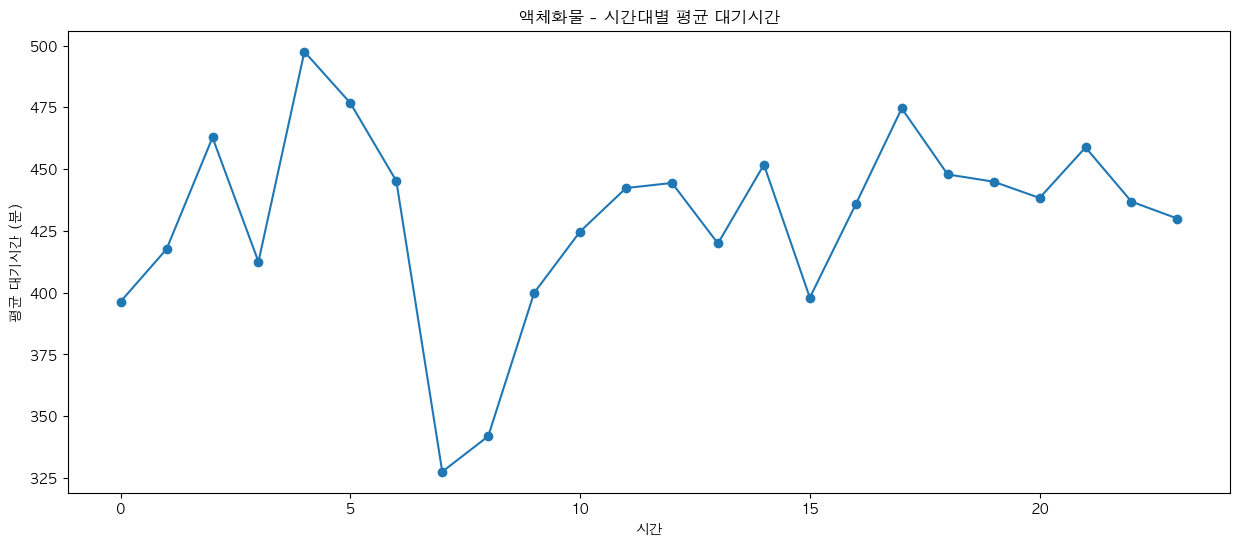

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# '액체화물' 열이 1인 행만 선택
liquid_df = df[df['액체화물'] == 1]

# Datetime 열을 datetime 형식으로 변환
liquid_df['Datetime'] = pd.to_datetime(liquid_df['Datetime'])

# 시간대별 그룹화 및 평균 대기시간 계산
hourly_avg_wait_time = liquid_df.groupby(liquid_df['Datetime'].dt.hour)['접안_대기시간_분'].mean()

# 그래프 설정
fig, ax = plt.subplots(figsize=(15, 6))
hourly_avg_wait_time.plot(kind='line', marker='o', ax=ax)
ax.set_title('액체화물 - 시간대별 평균 대기시간')
ax.set_xlabel('시간')
ax.set_ylabel('평균 대기시간 (분)')
plt.show()
